# 1. Breast.cancer - 이진분류

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
# 데이터 입력
cancer = load_breast_cancer()
df_pre = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_pre.head()

X = cancer.data
Y = cancer.target

In [5]:
# 모델 설정
model = Sequential([
    Dense(50, input_dim=30, activation='relu'),
    Dense(35, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
]) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1550      
_________________________________________________________________
dense_1 (Dense)              (None, 35)                1785      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                432       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 3,880
Trainable params: 3,880
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 모델 컴파일 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
# 모델 저장 폴더 설정
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [8]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "best{epoch:03d}-{val_loss:.4f}.hdf5"

# checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1)
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [9]:
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [10]:
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=500,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 2.15122, saving model to ./model/best001-2.1512.hdf5

Epoch 00002: val_loss improved from 2.15122 to 0.97820, saving model to ./model/best002-0.9782.hdf5

Epoch 00003: val_loss improved from 0.97820 to 0.88187, saving model to ./model/best003-0.8819.hdf5

Epoch 00004: val_loss did not improve from 0.88187

Epoch 00005: val_loss did not improve from 0.88187

Epoch 00006: val_loss improved from 0.88187 to 0.83331, saving model to ./model/best006-0.8333.hdf5

Epoch 00007: val_loss improved from 0.83331 to 0.66588, saving model to ./model/best007-0.6659.hdf5

Epoch 00008: val_loss did not improve from 0.66588

Epoch 00009: val_loss did not improve from 0.66588

Epoch 00010: val_loss did not improve from 0.66588

Epoch 00011: val_loss did not improve from 0.66588

Epoch 00012: val_loss did not improve from 0.66588

Epoch 00013: val_loss did not improve from 0.66588

Epoch 00014: val_loss did not improve from 0.66588

Epoch 00015: val_loss improved


Epoch 00116: val_loss improved from 0.26391 to 0.26382, saving model to ./model/best116-0.2638.hdf5

Epoch 00117: val_loss improved from 0.26382 to 0.26374, saving model to ./model/best117-0.2637.hdf5

Epoch 00118: val_loss improved from 0.26374 to 0.26346, saving model to ./model/best118-0.2635.hdf5

Epoch 00119: val_loss improved from 0.26346 to 0.26290, saving model to ./model/best119-0.2629.hdf5

Epoch 00120: val_loss improved from 0.26290 to 0.26207, saving model to ./model/best120-0.2621.hdf5

Epoch 00121: val_loss improved from 0.26207 to 0.26114, saving model to ./model/best121-0.2611.hdf5

Epoch 00122: val_loss improved from 0.26114 to 0.26032, saving model to ./model/best122-0.2603.hdf5

Epoch 00123: val_loss improved from 0.26032 to 0.25976, saving model to ./model/best123-0.2598.hdf5

Epoch 00124: val_loss improved from 0.25976 to 0.25948, saving model to ./model/best124-0.2595.hdf5

Epoch 00125: val_loss improved from 0.25948 to 0.25945, saving model to ./model/best125-0.


Epoch 00201: val_loss improved from 0.24941 to 0.24938, saving model to ./model/best201-0.2494.hdf5

Epoch 00202: val_loss improved from 0.24938 to 0.24926, saving model to ./model/best202-0.2493.hdf5

Epoch 00203: val_loss improved from 0.24926 to 0.24907, saving model to ./model/best203-0.2491.hdf5

Epoch 00204: val_loss improved from 0.24907 to 0.24889, saving model to ./model/best204-0.2489.hdf5

Epoch 00205: val_loss improved from 0.24889 to 0.24886, saving model to ./model/best205-0.2489.hdf5

Epoch 00206: val_loss did not improve from 0.24886

Epoch 00207: val_loss did not improve from 0.24886

Epoch 00208: val_loss improved from 0.24886 to 0.24875, saving model to ./model/best208-0.2488.hdf5

Epoch 00209: val_loss improved from 0.24875 to 0.24859, saving model to ./model/best209-0.2486.hdf5

Epoch 00210: val_loss improved from 0.24859 to 0.24848, saving model to ./model/best210-0.2485.hdf5

Epoch 00211: val_loss improved from 0.24848 to 0.24839, saving model to ./model/best211


Epoch 00288: val_loss improved from 0.24115 to 0.24099, saving model to ./model/best288-0.2410.hdf5

Epoch 00289: val_loss improved from 0.24099 to 0.24080, saving model to ./model/best289-0.2408.hdf5

Epoch 00290: val_loss improved from 0.24080 to 0.24062, saving model to ./model/best290-0.2406.hdf5

Epoch 00291: val_loss improved from 0.24062 to 0.24041, saving model to ./model/best291-0.2404.hdf5

Epoch 00292: val_loss improved from 0.24041 to 0.24031, saving model to ./model/best292-0.2403.hdf5

Epoch 00293: val_loss did not improve from 0.24031

Epoch 00294: val_loss did not improve from 0.24031

Epoch 00295: val_loss improved from 0.24031 to 0.24014, saving model to ./model/best295-0.2401.hdf5

Epoch 00296: val_loss improved from 0.24014 to 0.23975, saving model to ./model/best296-0.2398.hdf5

Epoch 00297: val_loss improved from 0.23975 to 0.23953, saving model to ./model/best297-0.2395.hdf5

Epoch 00298: val_loss improved from 0.23953 to 0.23952, saving model to ./model/best298


Epoch 00389: val_loss improved from 0.22377 to 0.22293, saving model to ./model/best389-0.2229.hdf5

Epoch 00390: val_loss improved from 0.22293 to 0.22213, saving model to ./model/best390-0.2221.hdf5

Epoch 00391: val_loss improved from 0.22213 to 0.22171, saving model to ./model/best391-0.2217.hdf5

Epoch 00392: val_loss improved from 0.22171 to 0.22167, saving model to ./model/best392-0.2217.hdf5

Epoch 00393: val_loss did not improve from 0.22167

Epoch 00394: val_loss improved from 0.22167 to 0.22158, saving model to ./model/best394-0.2216.hdf5

Epoch 00395: val_loss improved from 0.22158 to 0.22133, saving model to ./model/best395-0.2213.hdf5

Epoch 00396: val_loss improved from 0.22133 to 0.22116, saving model to ./model/best396-0.2212.hdf5

Epoch 00397: val_loss did not improve from 0.22116

Epoch 00398: val_loss did not improve from 0.22116

Epoch 00399: val_loss did not improve from 0.22116

Epoch 00400: val_loss did not improve from 0.22116

Epoch 00401: val_loss did not im


Epoch 00485: val_loss improved from 0.20011 to 0.20007, saving model to ./model/best485-0.2001.hdf5

Epoch 00486: val_loss did not improve from 0.20007

Epoch 00487: val_loss did not improve from 0.20007

Epoch 00488: val_loss did not improve from 0.20007

Epoch 00489: val_loss did not improve from 0.20007

Epoch 00490: val_loss did not improve from 0.20007

Epoch 00491: val_loss improved from 0.20007 to 0.19972, saving model to ./model/best491-0.1997.hdf5

Epoch 00492: val_loss improved from 0.19972 to 0.19926, saving model to ./model/best492-0.1993.hdf5

Epoch 00493: val_loss improved from 0.19926 to 0.19880, saving model to ./model/best493-0.1988.hdf5

Epoch 00494: val_loss improved from 0.19880 to 0.19853, saving model to ./model/best494-0.1985.hdf5

Epoch 00495: val_loss did not improve from 0.19853

Epoch 00496: val_loss did not improve from 0.19853

Epoch 00497: val_loss improved from 0.19853 to 0.19848, saving model to ./model/best497-0.1985.hdf5

Epoch 00498: val_loss improve


Epoch 00581: val_loss improved from 0.17606 to 0.17590, saving model to ./model/best581-0.1759.hdf5

Epoch 00582: val_loss improved from 0.17590 to 0.17571, saving model to ./model/best582-0.1757.hdf5

Epoch 00583: val_loss improved from 0.17571 to 0.17554, saving model to ./model/best583-0.1755.hdf5

Epoch 00584: val_loss improved from 0.17554 to 0.17541, saving model to ./model/best584-0.1754.hdf5

Epoch 00585: val_loss improved from 0.17541 to 0.17526, saving model to ./model/best585-0.1753.hdf5

Epoch 00586: val_loss improved from 0.17526 to 0.17505, saving model to ./model/best586-0.1750.hdf5

Epoch 00587: val_loss improved from 0.17505 to 0.17493, saving model to ./model/best587-0.1749.hdf5

Epoch 00588: val_loss did not improve from 0.17493

Epoch 00589: val_loss improved from 0.17493 to 0.17487, saving model to ./model/best589-0.1749.hdf5

Epoch 00590: val_loss improved from 0.17487 to 0.17466, saving model to ./model/best590-0.1747.hdf5

Epoch 00591: val_loss improved from 0.


Epoch 00692: val_loss did not improve from 0.16412

Epoch 00693: val_loss did not improve from 0.16412

Epoch 00694: val_loss did not improve from 0.16412

Epoch 00695: val_loss did not improve from 0.16412

Epoch 00696: val_loss improved from 0.16412 to 0.16180, saving model to ./model/best696-0.1618.hdf5

Epoch 00697: val_loss did not improve from 0.16180

Epoch 00698: val_loss did not improve from 0.16180

Epoch 00699: val_loss did not improve from 0.16180

Epoch 00700: val_loss did not improve from 0.16180

Epoch 00701: val_loss did not improve from 0.16180

Epoch 00702: val_loss did not improve from 0.16180

Epoch 00703: val_loss did not improve from 0.16180

Epoch 00704: val_loss did not improve from 0.16180

Epoch 00705: val_loss did not improve from 0.16180

Epoch 00706: val_loss did not improve from 0.16180

Epoch 00707: val_loss did not improve from 0.16180

Epoch 00708: val_loss did not improve from 0.16180

Epoch 00709: val_loss did not improve from 0.16180

Epoch 00710: v


Epoch 00841: val_loss did not improve from 0.14886

Epoch 00842: val_loss improved from 0.14886 to 0.14593, saving model to ./model/best842-0.1459.hdf5

Epoch 00843: val_loss did not improve from 0.14593

Epoch 00844: val_loss improved from 0.14593 to 0.14101, saving model to ./model/best844-0.1410.hdf5

Epoch 00845: val_loss did not improve from 0.14101

Epoch 00846: val_loss improved from 0.14101 to 0.13456, saving model to ./model/best846-0.1346.hdf5

Epoch 00847: val_loss did not improve from 0.13456

Epoch 00848: val_loss improved from 0.13456 to 0.13168, saving model to ./model/best848-0.1317.hdf5

Epoch 00849: val_loss did not improve from 0.13168

Epoch 00850: val_loss did not improve from 0.13168

Epoch 00851: val_loss did not improve from 0.13168

Epoch 00852: val_loss did not improve from 0.13168

Epoch 00853: val_loss did not improve from 0.13168

Epoch 00854: val_loss did not improve from 0.13168

Epoch 00855: val_loss did not improve from 0.13168

Epoch 00856: val_loss d


Epoch 01006: val_loss did not improve from 0.11224

Epoch 01007: val_loss did not improve from 0.11224

Epoch 01008: val_loss did not improve from 0.11224

Epoch 01009: val_loss did not improve from 0.11224

Epoch 01010: val_loss did not improve from 0.11224

Epoch 01011: val_loss did not improve from 0.11224

Epoch 01012: val_loss did not improve from 0.11224

Epoch 01013: val_loss did not improve from 0.11224

Epoch 01014: val_loss did not improve from 0.11224

Epoch 01015: val_loss did not improve from 0.11224

Epoch 01016: val_loss did not improve from 0.11224

Epoch 01017: val_loss did not improve from 0.11224

Epoch 01018: val_loss did not improve from 0.11224

Epoch 01019: val_loss did not improve from 0.11224

Epoch 01020: val_loss did not improve from 0.11224

Epoch 01021: val_loss did not improve from 0.11224

Epoch 01022: val_loss did not improve from 0.11224

Epoch 01023: val_loss did not improve from 0.11224

Epoch 01024: val_loss did not improve from 0.11224

Epoch 01025

In [12]:
# 1838번이 베스트, best1004-0.1122

In [11]:
del model

In [12]:
model = load_model('model/best1004-0.1122.hdf5')
print("\n Accuracy: %.4f" % (model.evaluate(X, Y, verbose=2)[1]))

569/569 - 0s - loss: 0.0837 - accuracy: 0.9596

 Accuracy: 0.9596


In [13]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

In [14]:
# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

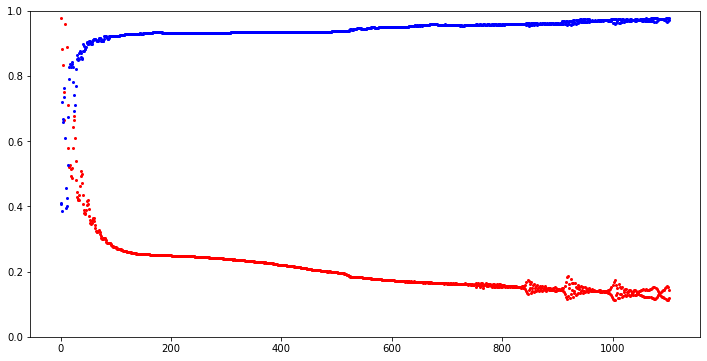

In [15]:
# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,6))
plt.ylim(0,1)
plt.plot(x_len, y_vloss, "o", c="red", markersize=2)
plt.plot(x_len, y_acc, "o", c="blue", markersize=2)

plt.show()

# 2. load.digits - 다중분류

In [1]:
from sklearn.datasets import load_digits

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
di = load_digits()
df_pre2 = pd.DataFrame(di.data)
df_pre2.head(20)

X = di.data
Y = di.target

In [4]:
from sklearn.preprocessing import LabelEncoder

e = LabelEncoder()
e.fit(Y)
Y = e.transform(Y)

In [5]:
# One hot encoding
Y_encoded = tf.keras.utils.to_categorical(Y)
Y_encoded[0], Y_encoded[50], Y_encoded[100]

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32))

In [6]:
Y_encoded.shape

(1797, 10)

In [7]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [8]:
# 학습셋과 테스트셋의 구분
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, 
                                                    random_state=seed)

In [9]:
# 모델 설정
model = Sequential([
    Dense(90, input_dim=64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(30, activation='relu'),
    Dense(18, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 90)                5850      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                5824      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1950      
_________________________________________________________________
dense_3 (Dense)              (None, 18)                558       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                190       
Total params: 14,372
Trainable params: 14,372
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 모델 컴파일 
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
# 모델 저장 폴더 설정
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [12]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "best{epoch:03d}-{val_loss:.4f}.hdf5"

# checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1)
checkpointer_callback = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [13]:
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [14]:
# 모델 실행 및 저장
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=3500, batch_size=500,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer_callback])


Epoch 00001: val_loss improved from inf to 2.75415, saving model to ./model/best001-2.7541.hdf5

Epoch 00002: val_loss improved from 2.75415 to 2.32277, saving model to ./model/best002-2.3228.hdf5

Epoch 00003: val_loss improved from 2.32277 to 2.07860, saving model to ./model/best003-2.0786.hdf5

Epoch 00004: val_loss improved from 2.07860 to 1.91561, saving model to ./model/best004-1.9156.hdf5

Epoch 00005: val_loss improved from 1.91561 to 1.81373, saving model to ./model/best005-1.8137.hdf5

Epoch 00006: val_loss improved from 1.81373 to 1.70394, saving model to ./model/best006-1.7039.hdf5

Epoch 00007: val_loss improved from 1.70394 to 1.57633, saving model to ./model/best007-1.5763.hdf5

Epoch 00008: val_loss improved from 1.57633 to 1.46009, saving model to ./model/best008-1.4601.hdf5

Epoch 00009: val_loss improved from 1.46009 to 1.34522, saving model to ./model/best009-1.3452.hdf5

Epoch 00010: val_loss improved from 1.34522 to 1.23983, saving model to ./model/best010-1.2398


Epoch 00117: val_loss did not improve from 0.10394

Epoch 00118: val_loss did not improve from 0.10394

Epoch 00119: val_loss did not improve from 0.10394

Epoch 00120: val_loss did not improve from 0.10394

Epoch 00121: val_loss did not improve from 0.10394

Epoch 00122: val_loss did not improve from 0.10394

Epoch 00123: val_loss did not improve from 0.10394

Epoch 00124: val_loss did not improve from 0.10394

Epoch 00125: val_loss did not improve from 0.10394

Epoch 00126: val_loss did not improve from 0.10394

Epoch 00127: val_loss did not improve from 0.10394

Epoch 00128: val_loss did not improve from 0.10394

Epoch 00129: val_loss did not improve from 0.10394

Epoch 00130: val_loss did not improve from 0.10394

Epoch 00131: val_loss did not improve from 0.10394

Epoch 00132: val_loss did not improve from 0.10394

Epoch 00133: val_loss did not improve from 0.10394

Epoch 00134: val_loss did not improve from 0.10394

Epoch 00135: val_loss did not improve from 0.10394

Epoch 00136

In [15]:
del model

In [16]:
model = load_model('model/best069-0.1039.hdf5')
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test, verbose=2)[1]))

360/360 - 0s - loss: 0.1071 - accuracy: 0.9750

 Accuracy: 0.9750


In [17]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

In [18]:
# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

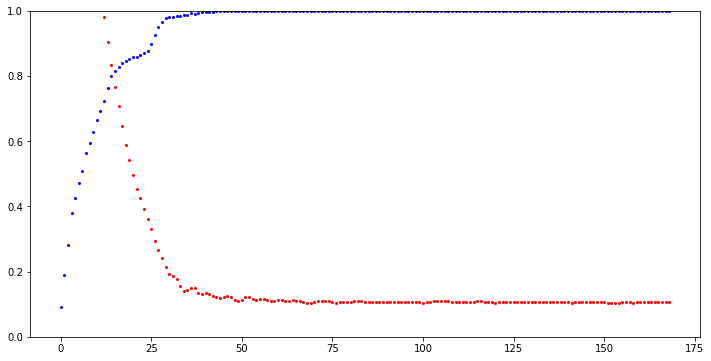

In [19]:
# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,6))
plt.ylim(0,1)
plt.plot(x_len, y_vloss, "o", c="red", markersize=2)
plt.plot(x_len, y_acc, "o", c="blue", markersize=2)

plt.show()